### Tutorial 1 - A Quick Demo

In this first tutorial, we want to present some basics of DASF framework and how you can use it to manage your machine learning algorithms in a multi architecture environemnt like single machines, clusteres and GPUs.

If you are familiar with all the [scikit-learn](https://scikit-learn.org/stable/index.html) API, DASF has the same methodology of function notations. The only difference of DASF is that this framework is directly associated with the host environment. If you are using a clustered environment with [Dask](https://www.dask.org/) for example, you will use the optimized functions for that environment type. If you are running your code in a single GPU host environment, your code will have the specific optimizations for that type and so on so forth.

Let's try our first example with some basic clustering algorithm. First, create a simple dataset using `make_blobs` function.

In [1]:
import sys
sys.path.append("../..")

In [6]:
from dasf.datasets import make_blobs

n_samples = 500000
n_bins = 3

# Generate 3 blobs with 2 classes where the second blob contains
# half positive samples and half negative samples. Probability in this
# blob is therefore 0.5.
import cupy as cp
centers = cp.array([(-6, -6), (0, 0), (9, 1)])
X, y = make_blobs(n_samples=n_samples, centers=centers, shuffle=False, random_state=42)

Notice that we are using the same code available in scikit-learn tutorials and demos.

To have a better view of the data distribution, we can plot the generated dataset.

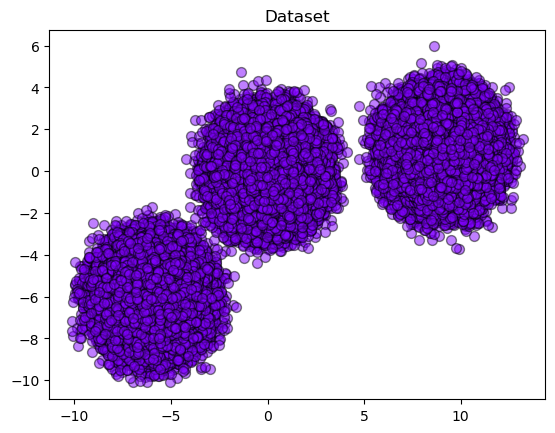

In [8]:
# Only to generate colors
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt

colors = cm.rainbow(np.linspace(0.0, 1.0, 1))

plt.figure()
plt.scatter(
    X[:, 0].get(),
    X[:, 1].get(),
    s=50,
    c=colors[np.newaxis, :],
    alpha=0.5,
    edgecolor="k",
)
plt.title("Dataset")

plt.show()

Once, we have the big picture of how our dataset is distributed, let's run two clustering algorithms to understand how it can be classified.

For this tutorial, we decided to use KMeans and SOM (Kohonen's Self-Organized Map) as an example.

In [9]:
from dasf.ml.cluster import KMeans
from dasf.ml.cluster import SOM

kmeans = KMeans(n_clusters=3, max_iter=100)
som = SOM(x=1, y=3, input_len=2, num_epochs=100)

As we know our dataset defines 3 centers with 2 classes, we set KMeans `n_clusters` parameter with the same number of classes of our dataset. On the other hand, SOM is based on an activation map and it does not necessary needs a 1-D map with 3 activation points, but we want to use here to help the classification algorithm also. See that as we also know that our dataset contains two classes, the parameter `input_len` of SOM needs to be set as **2** (same number of classes).

Now, it is time to `fit_predict` both classifiers. Let's analyze KMeans first.

In [10]:
%time result_kmeans = kmeans.fit_predict(X)

TypeError: fit_predict() takes at most 3 positional arguments (4 given)

KMeans is a fast algorithm compared to SOM. For further reference, let's see the speed of the SOM algorithm.

In [12]:
%time result_som = som.fit_predict(X)

CPU times: user 5min 2s, sys: 163 ms, total: 5min 2s
Wall time: 5min 2s


Now, let's see the performance of each prediction. The first one is KMeans results.

In [16]:
from itertools import cycle

def plot_results(X, result):
    y_unique = np.unique(result)
    
    colors = cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    
    for this_y, color in zip(y_unique, colors):
        this_X = X[result == this_y]
        plt.scatter(
            this_X[:, 0].get(),
            this_X[:, 1].get(),
            s=50,
            c=color[np.newaxis, :],
            alpha=0.5,
            edgecolor="k",
            label="Class %s" % this_y,
        )

plot_results(X, result_kmeans)

NameError: name 'result_kmeans' is not defined

Now, let's see how SOM results look like.

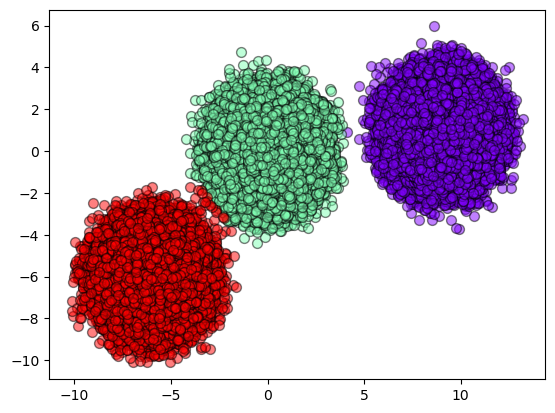

In [17]:
plot_results(X, result_som)

As we cam see, the results do not seem similar but they are accurated.

The idea behind this tutorial is not to exaplain how both algorithms work, but how can you use DASF framework the same way you use the most famous Machine Learning libraries.

If you are curious, try to run the same code using a machine with GPU. Compare the results and see if the behaviour is the same!